# Classificação e Interpretação de Variáveis com Regressão Logística e SHAP


In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Exemplo de como carregar o conjunto de dados Breast Cancer Wisconsin da biblioteca sklearn
dados = load_breast_cancer()
X = pd.DataFrame(dados.data, columns=dados.feature_names)
y = pd.Series(dados.target, name="diagnosis") # 0 = Maligno, 1 = Benigno

# Exibição de informações básicas sobre o dataset
print(f"Dimensões do conjunto de dados: {X.shape}")
print(f"Distribuição das classes:\n{y.value_counts()}")
print(f"Feature Names:\n{X.columns}")

Dimensões do conjunto de dados: (569, 30)
Distribuição das classes:
diagnosis
1    357
0    212
Name: count, dtype: int64
Feature Names:
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Verificando o resultado
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (455, 30)
Tamanho do conjunto de teste: (114, 30)


In [ ]:
modelo = LogisticRegression(max_iter=10000, random_state=42)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

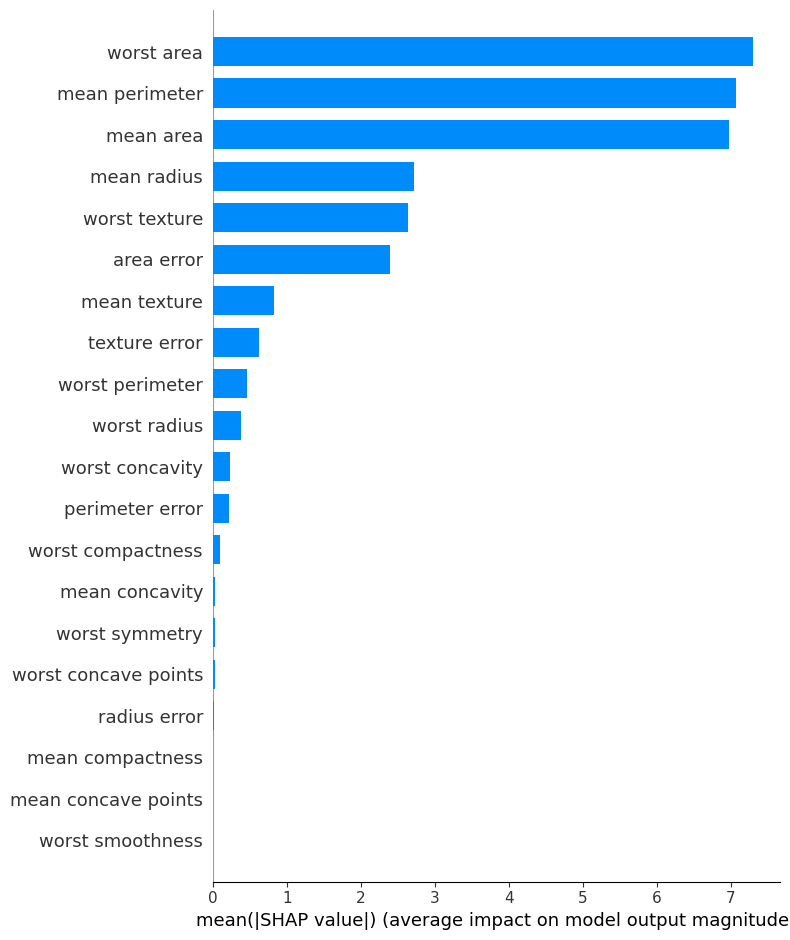


Interpretação para o exemplo 1:

Interpretação para o exemplo 2:

Interpretação para o exemplo 3:


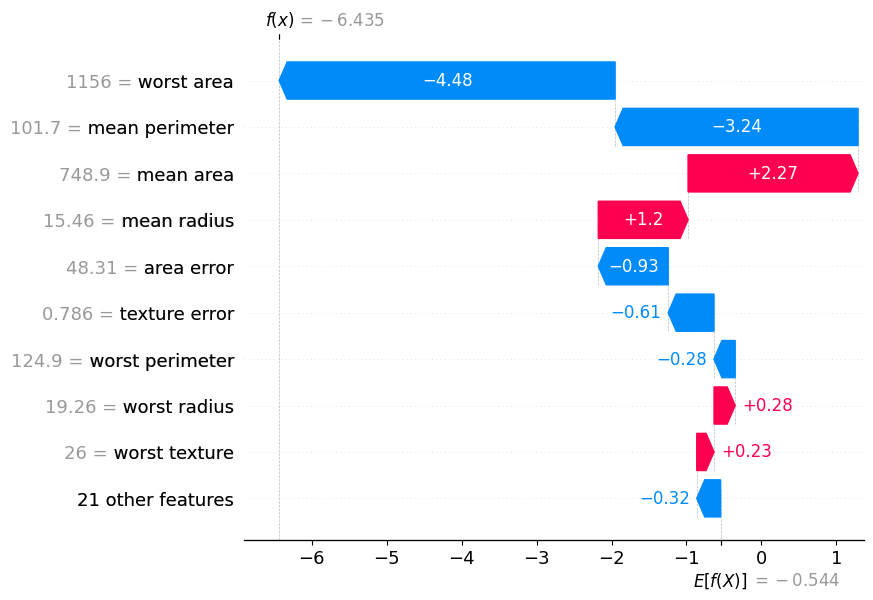

In [ ]:
# Inicializando o Explainer SHAP para o modelo de Regressão Logística
explainer = shap.Explainer(modelo, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary para entender a importância geral das variáveis
shap.summary_plot(shap_values, X_test, plot_type="bar")
# Análise detalhada para três exemplos de pacientes
for i in range(3):
  print(f"\nInterpretação para o exemplo {i+1}:")
shap.initjs()
shap.waterfall_plot(shap_values[i])
